In [1]:
# Import Required Libraries
try:
    import tensorflow as tf
    import os
    import random
    import numpy as np
    from tqdm import tqdm 
    from skimage.io import imread, imshow
    from skimage.transform import resize
    import matplotlib.pyplot as plt
    from tensorflow.keras.models import load_model
    from keras.models import model_from_json
    print("----Libraries Imported----")
except:
    print("----Libraries Not Imported----")



----Libraries Imported----


In [2]:
# checking the content of the current directory
os.listdir()


['Classification_model.json',
 'Folder_Creater.py',
 'Images',
 'main.ipynb',
 'main.py',
 'Orange_Fruit_Weights2.h5',
 'Orange_Fruit_Weights_segmentation.h5',
 'Prediction_file.py',
 'README.md',
 'rename_image.py',
 'Segmentation_model.json',
 'test_data',
 'train_data',
 'UNet_Model.py',
 '__pycache__']

In [3]:
# Setting up path
seed = 42
np.random.seed = seed

IMG_WIDTH = 128
IMG_HEIGHT = 128
IMG_CHANNELS = 3


TRAIN_PATH = 'E:/Projects 6th SEM/Orange-Fruit-Recognition-Using-Image-Segmentation/Image Segmentaion/train_data/'
TEST_PATH = 'E:/Projects 6th SEM/Orange-Fruit-Recognition-Using-Image-Segmentation/Image Segmentaion/test_data/'

train_ids = next(os.walk(TRAIN_PATH))[1]
test_ids = next(os.walk(TEST_PATH))[1]

print(train_ids)
print(test_ids)


['abcd1', 'abcd10', 'abcd100', 'abcd101', 'abcd102', 'abcd104', 'abcd105', 'abcd106', 'abcd107', 'abcd108', 'abcd109', 'abcd11', 'abcd110', 'abcd111', 'abcd112', 'abcd113', 'abcd114', 'abcd115', 'abcd116', 'abcd117', 'abcd12', 'abcd13', 'abcd14', 'abcd15', 'abcd16', 'abcd17', 'abcd18', 'abcd19', 'abcd2', 'abcd20', 'abcd21', 'abcd22', 'abcd23', 'abcd24', 'abcd25', 'abcd26', 'abcd27', 'abcd28', 'abcd29', 'abcd3', 'abcd30', 'abcd31', 'abcd32', 'abcd33', 'abcd34', 'abcd35', 'abcd36', 'abcd37', 'abcd39', 'abcd4', 'abcd40', 'abcd41', 'abcd42', 'abcd43', 'abcd44', 'abcd45', 'abcd46', 'abcd47', 'abcd48', 'abcd49', 'abcd5', 'abcd50', 'abcd51', 'abcd52', 'abcd53', 'abcd54', 'abcd55', 'abcd56', 'abcd57', 'abcd58', 'abcd59', 'abcd6', 'abcd60', 'abcd65', 'abcd66', 'abcd67', 'abcd68', 'abcd69', 'abcd7', 'abcd70', 'abcd71', 'abcd73', 'abcd74', 'abcd75', 'abcd76', 'abcd77', 'abcd78', 'abcd79', 'abcd8', 'abcd80', 'abcd81', 'abcd82', 'abcd83', 'abcd84', 'abcd85', 'abcd86', 'abcd87', 'abcd88', 'abcd89', 

In [4]:
# Loading Unet
segmentation_model = model_from_json(open("Segmentation_model.json", "r").read())  
segmentation_model.load_weights('Orange_Fruit_Weights_segmentation.h5')


C:\Users\Ayush\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\layers\core.py:1057: UserWarning: UNet_Model is not loaded, but a Lambda layer uses it. It may cause errors.
  warnings.warn('{} is not loaded, but a Lambda layer uses it. '


In [5]:
# Loading Classification Model

import Prediction_file as pf
classification_model = pf.Loading_Model()


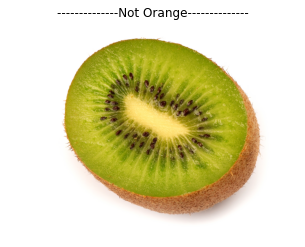

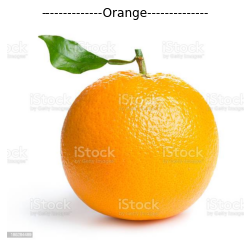

In [6]:
# Prediction

path1 = 'Images/kiwi.jpg'
path2 = 'Images/Orange.jpg'

pred1 = pf.predicting(path1,classification_model)
pred2 = pf.predicting(path2,classification_model)




In [7]:
print(pred2)

[[0.9958103]]


In [8]:
print(pred1)

[[0.00013249]]


In [9]:
def process_image(path):
    img = load_img(path, target_size = (IMG_WIDTH,IMG_HEIGHT))
    img_tensor = img_to_array(img)
    img_tensor = np.expand_dims(img_tensor, axis = 0)
    img_tensor/=255.0
    return img_tensor

if pred2 > 0.5:
    p = segmentation_model.predict(process_image(path2), verbose=1)
    p_t = (p > 0.5).astype(np.uint8)
    imshow(np.squeeze(p_t))
    plt.show()
    

NameError: name 'load_img' is not defined

1/1 [==============================] - 2s 2s/step


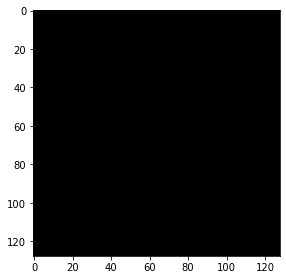

In [10]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
def process_image(path):
    img = load_img(path, target_size = (IMG_WIDTH,IMG_HEIGHT))
    img_tensor = img_to_array(img)
    img_tensor = np.expand_dims(img_tensor, axis = 0)
    img_tensor/=255.0
    return img_tensor

if pred2 > 0.5:
    p = segmentation_model.predict(process_image(path2), verbose=1)
    p_t = (p > 0.5).astype(np.uint8)
    imshow(np.squeeze(p_t))
    plt.show()
    

In [11]:
imshow(p)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


TypeError: Invalid shape (1, 128, 128, 1) for image data

In [12]:
p = segmentation_model.predict(process_image(path1), verbose=1)
    p_t = (p > 0.5).astype(np.uint8)
    imshow(np.squeeze(p_t))
    plt.show()

IndentationError: unexpected indent (<ipython-input-12-80f5f51c7715>, line 2)

1/1 [==============================] - 0s 44ms/step


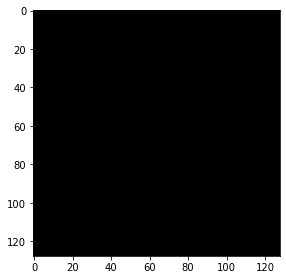

In [13]:
p = segmentation_model.predict(process_image(path1), verbose=1)
p_t = (p > 0.5).astype(np.uint8)
imshow(np.squeeze(p_t))
plt.show()